# Nội dung

 Trực quan hóa dữ liệu trên tập dữ liệu về bệnh tiểu đường.

## Bài làm

### Import các thư viện cần thiết cho trực quan hóa dữ liệu

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load dữ liệu

In [53]:
df = pd.read_csv("diabetes.csv")

### Tổng quan về dữ liệu

In [54]:
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


None

In [55]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Xử lý và trực quan hóa dữ liệu

sau khi xem tổng quan về dữ liệu, một số biến như Glucose, BloodPressure, SkinThickness, Insulin, BMI có giá trị bằng 0 là điểm bất thường. Vì vậy sẽ thay 0 bằng NaN

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

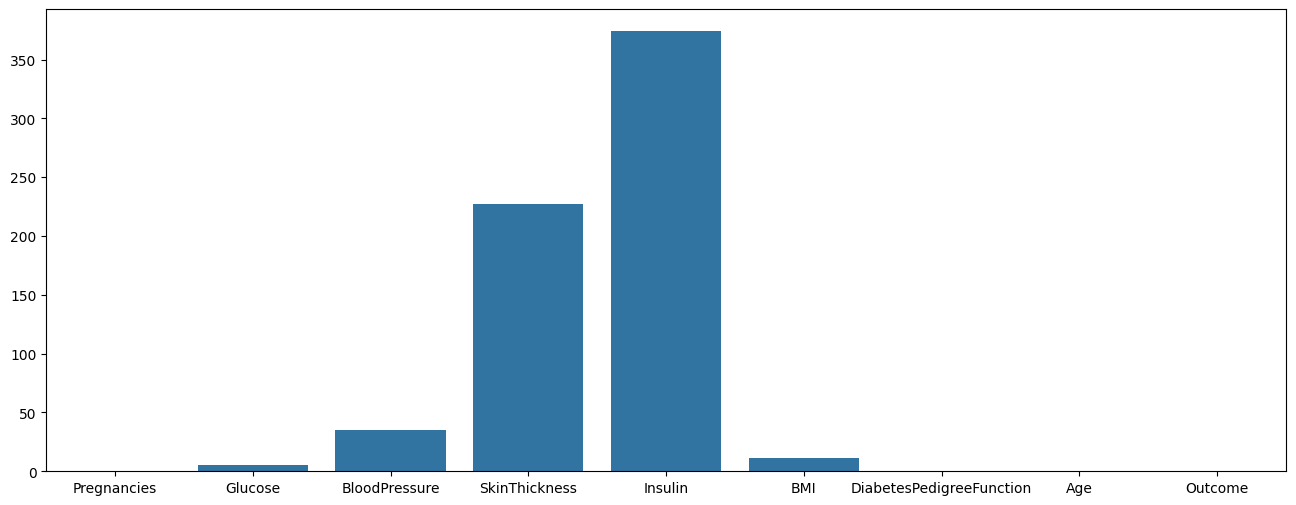

In [56]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
plt.figure(figsize=(16,6))
display(df.isna().sum(),sns.barplot(df.isna().sum()))

Sau đó thay thế các giá trị này bằng Median

In [57]:
change_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[change_col] = df[change_col].fillna(df[change_col].median())
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Biến Target dạng cột

Có 500 người khỏe mạnh và 268 người bị tiểu đường


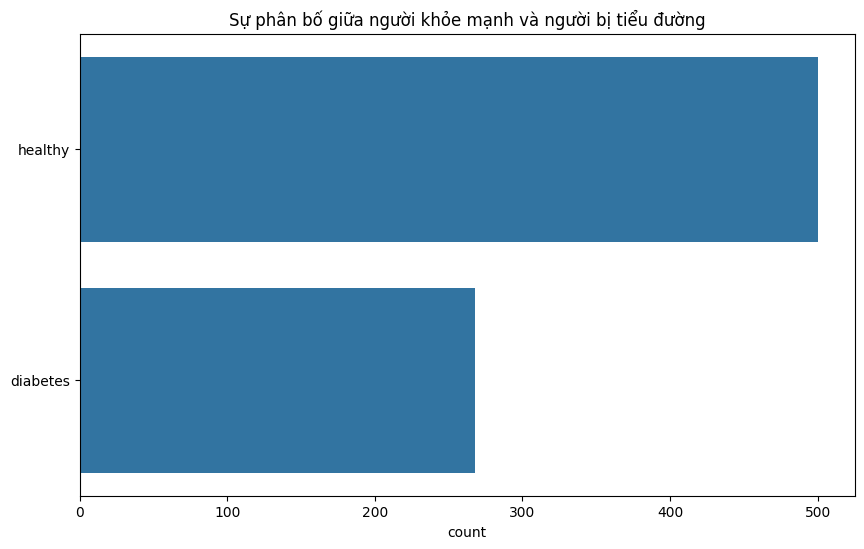

In [58]:
plt.figure(figsize=(10,6))
plt.title("Sự phân bố giữa người khỏe mạnh và người bị tiểu đường")
sns.barplot(x=df['Outcome'].value_counts() ,y=['healthy','diabetes'])
print("Có {} người khỏe mạnh và {} người bị tiểu đường".format(df['Outcome'].value_counts()[0],df['Outcome'].value_counts()[1]))

Biến target dạng biểu đồ tròn

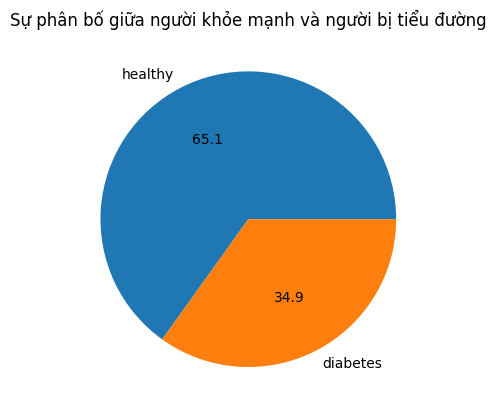

In [59]:
plt.pie(labels=['healthy','diabetes'], x=df['Outcome'].value_counts(),autopct='%.1f')
plt.title("Sự phân bố giữa người khỏe mạnh và người bị tiểu đường")
plt.show()

tỉ lệ người khỏe mạnh chiếm 65.1% và người bị tiểu đường chiếm 34.9% trong tập dữ liệu này. Việc này cho biến target không cần bằng trong tập dữ liệu.

### Histplot

[Text(0.5, 1.0, 'Sự phân phối của SkinThickness')]

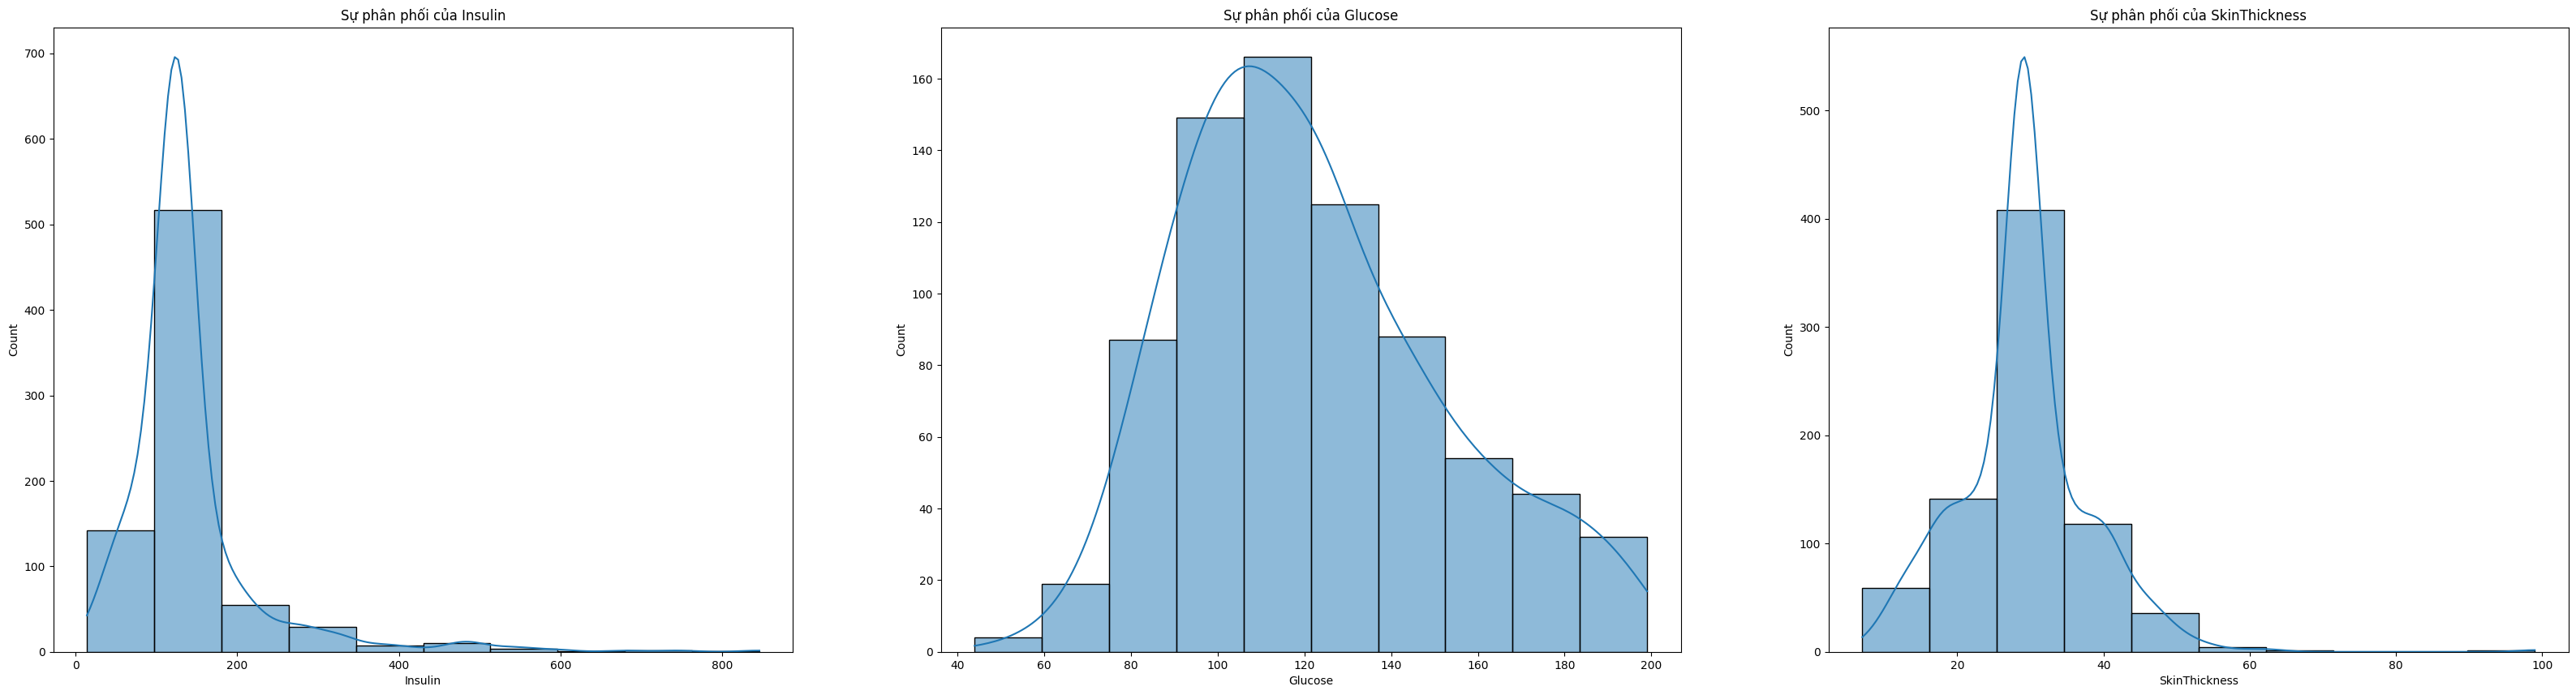

In [60]:
fig, ax = plt.subplots(1,3,figsize=(40,10))
sns.histplot(ax = ax[0], x = df['Insulin'],bins = 10,kde = True,cbar = True).set(title ="Sự phân phối của Insulin")
sns.histplot(ax = ax[1], x = df['Glucose'],bins = 10,kde = True,cbar = True).set(title ="Sự phân phối của Glucose")
sns.histplot(ax = ax[2], x = df['SkinThickness'],bins = 10,kde = True,cbar = True).set(title ="Sự phân phối của SkinThickness")

[Text(0.5, 1.0, 'Sự phân phối của BloodPressure')]

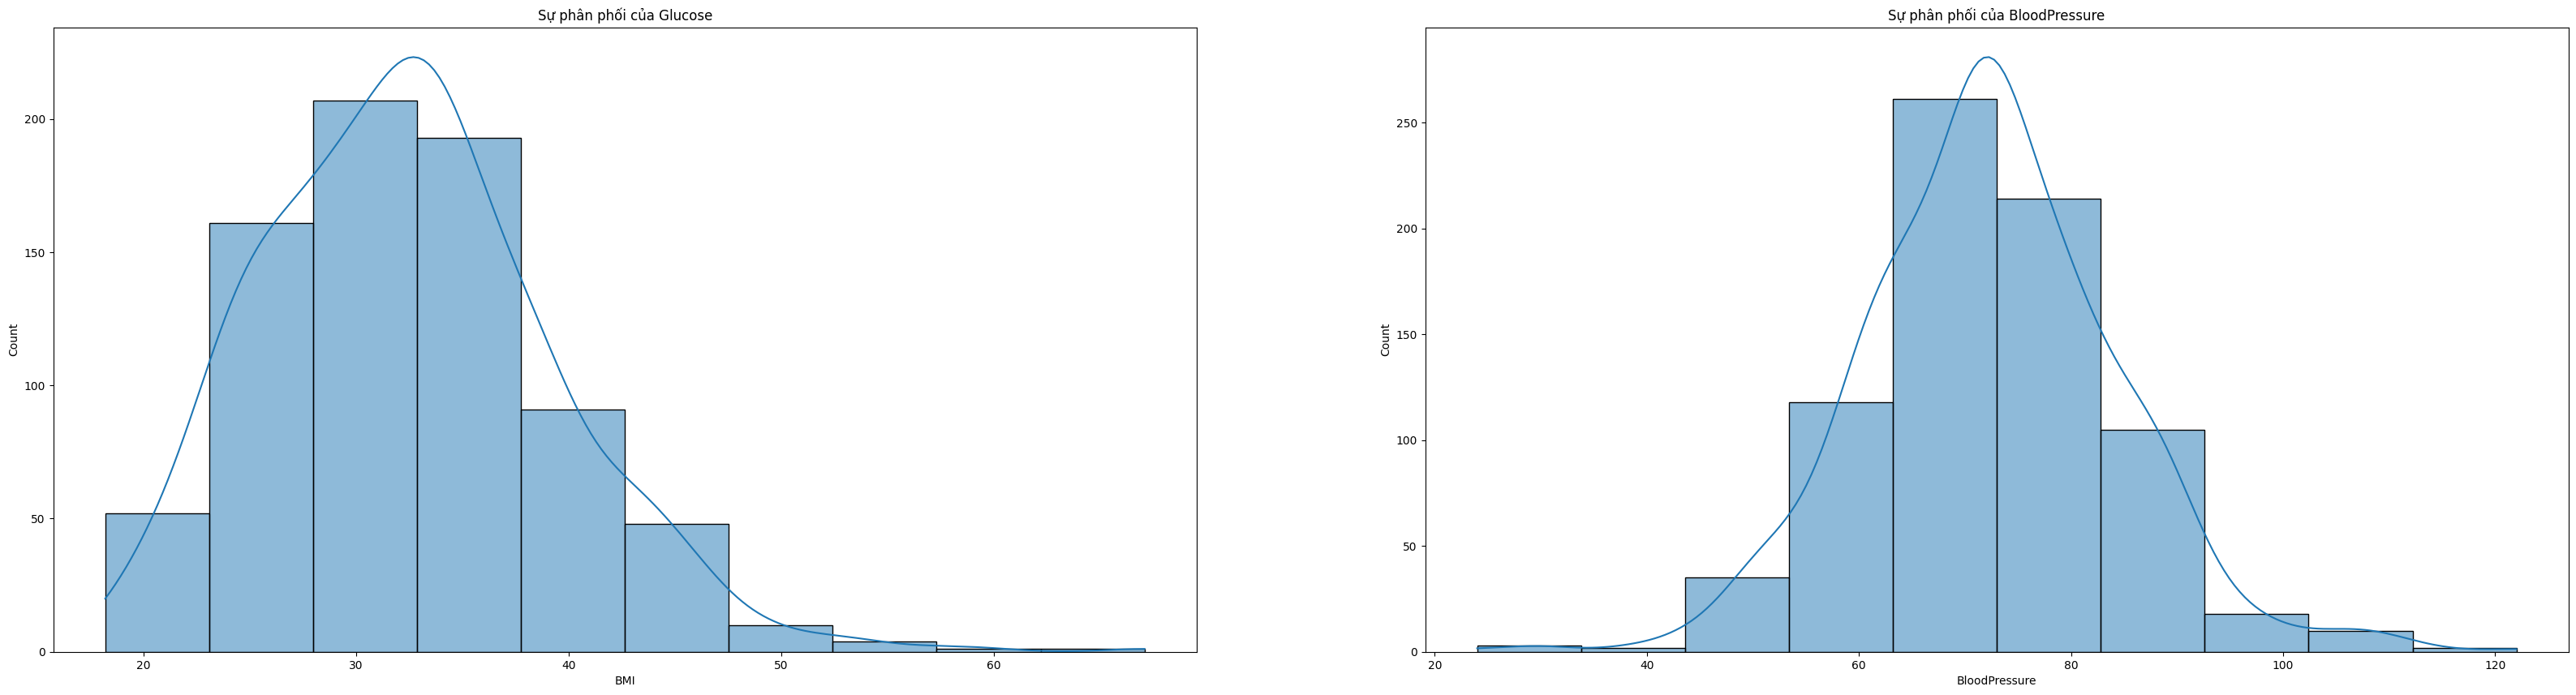

In [61]:
fig, ax = plt.subplots(1,2,figsize=(40,10))
sns.histplot(ax = ax[0], x = df['BMI'],bins = 10,kde = True,cbar = True).set(title= "Sự phân phối của Glucose")
sns.histplot(ax = ax[1], x = df['BloodPressure'],bins = 10,kde = True,cbar = True).set(title="Sự phân phối của BloodPressure")

### Histogram

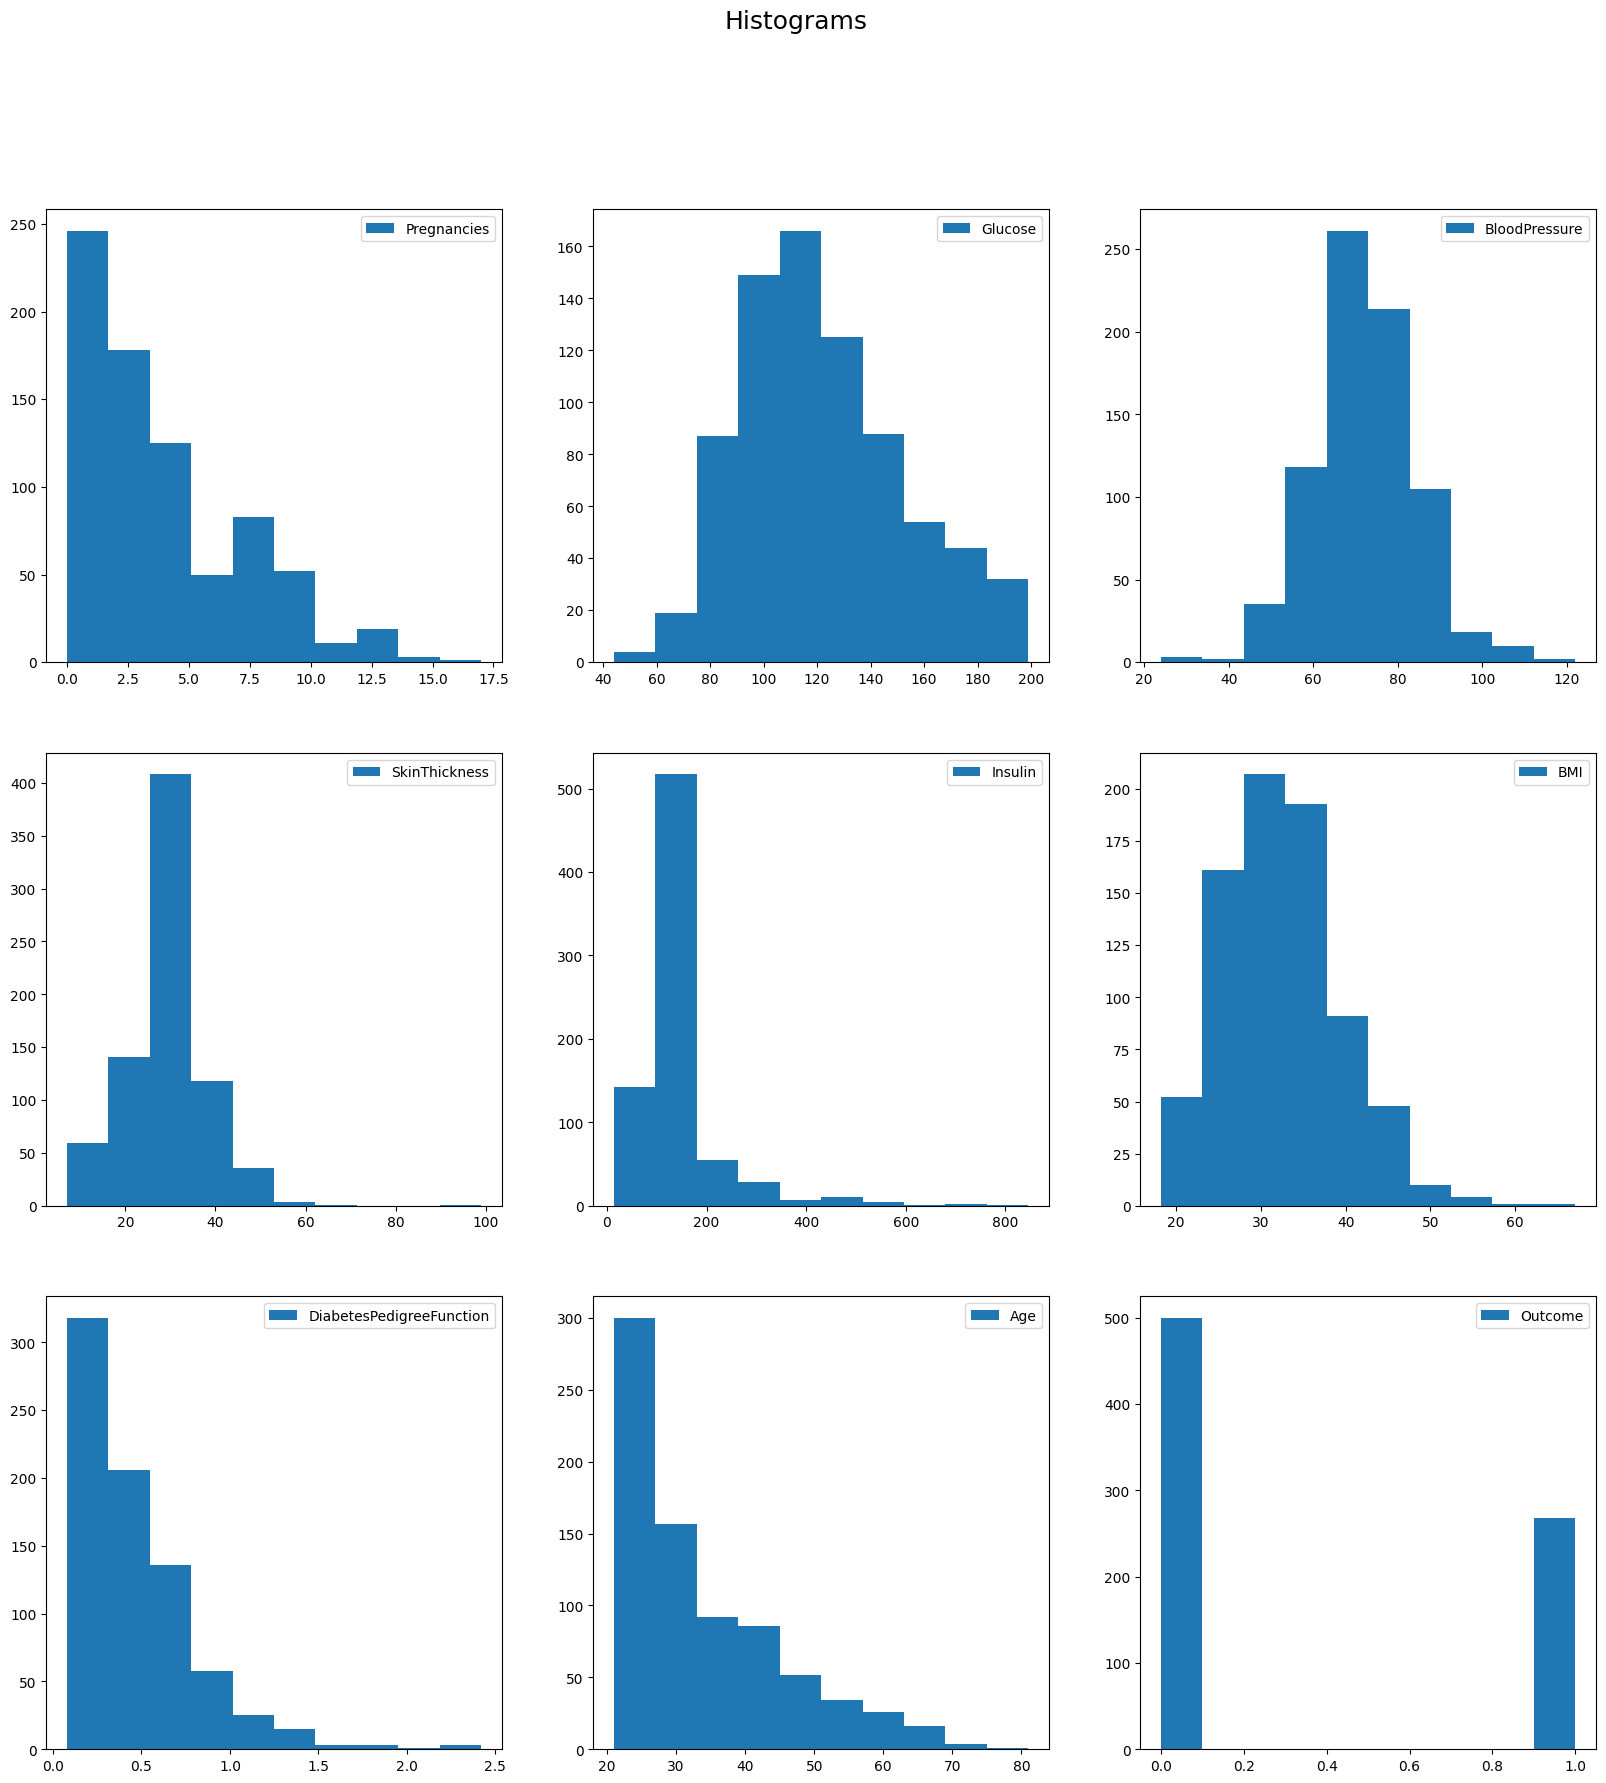

In [66]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))


for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

### Pairplot

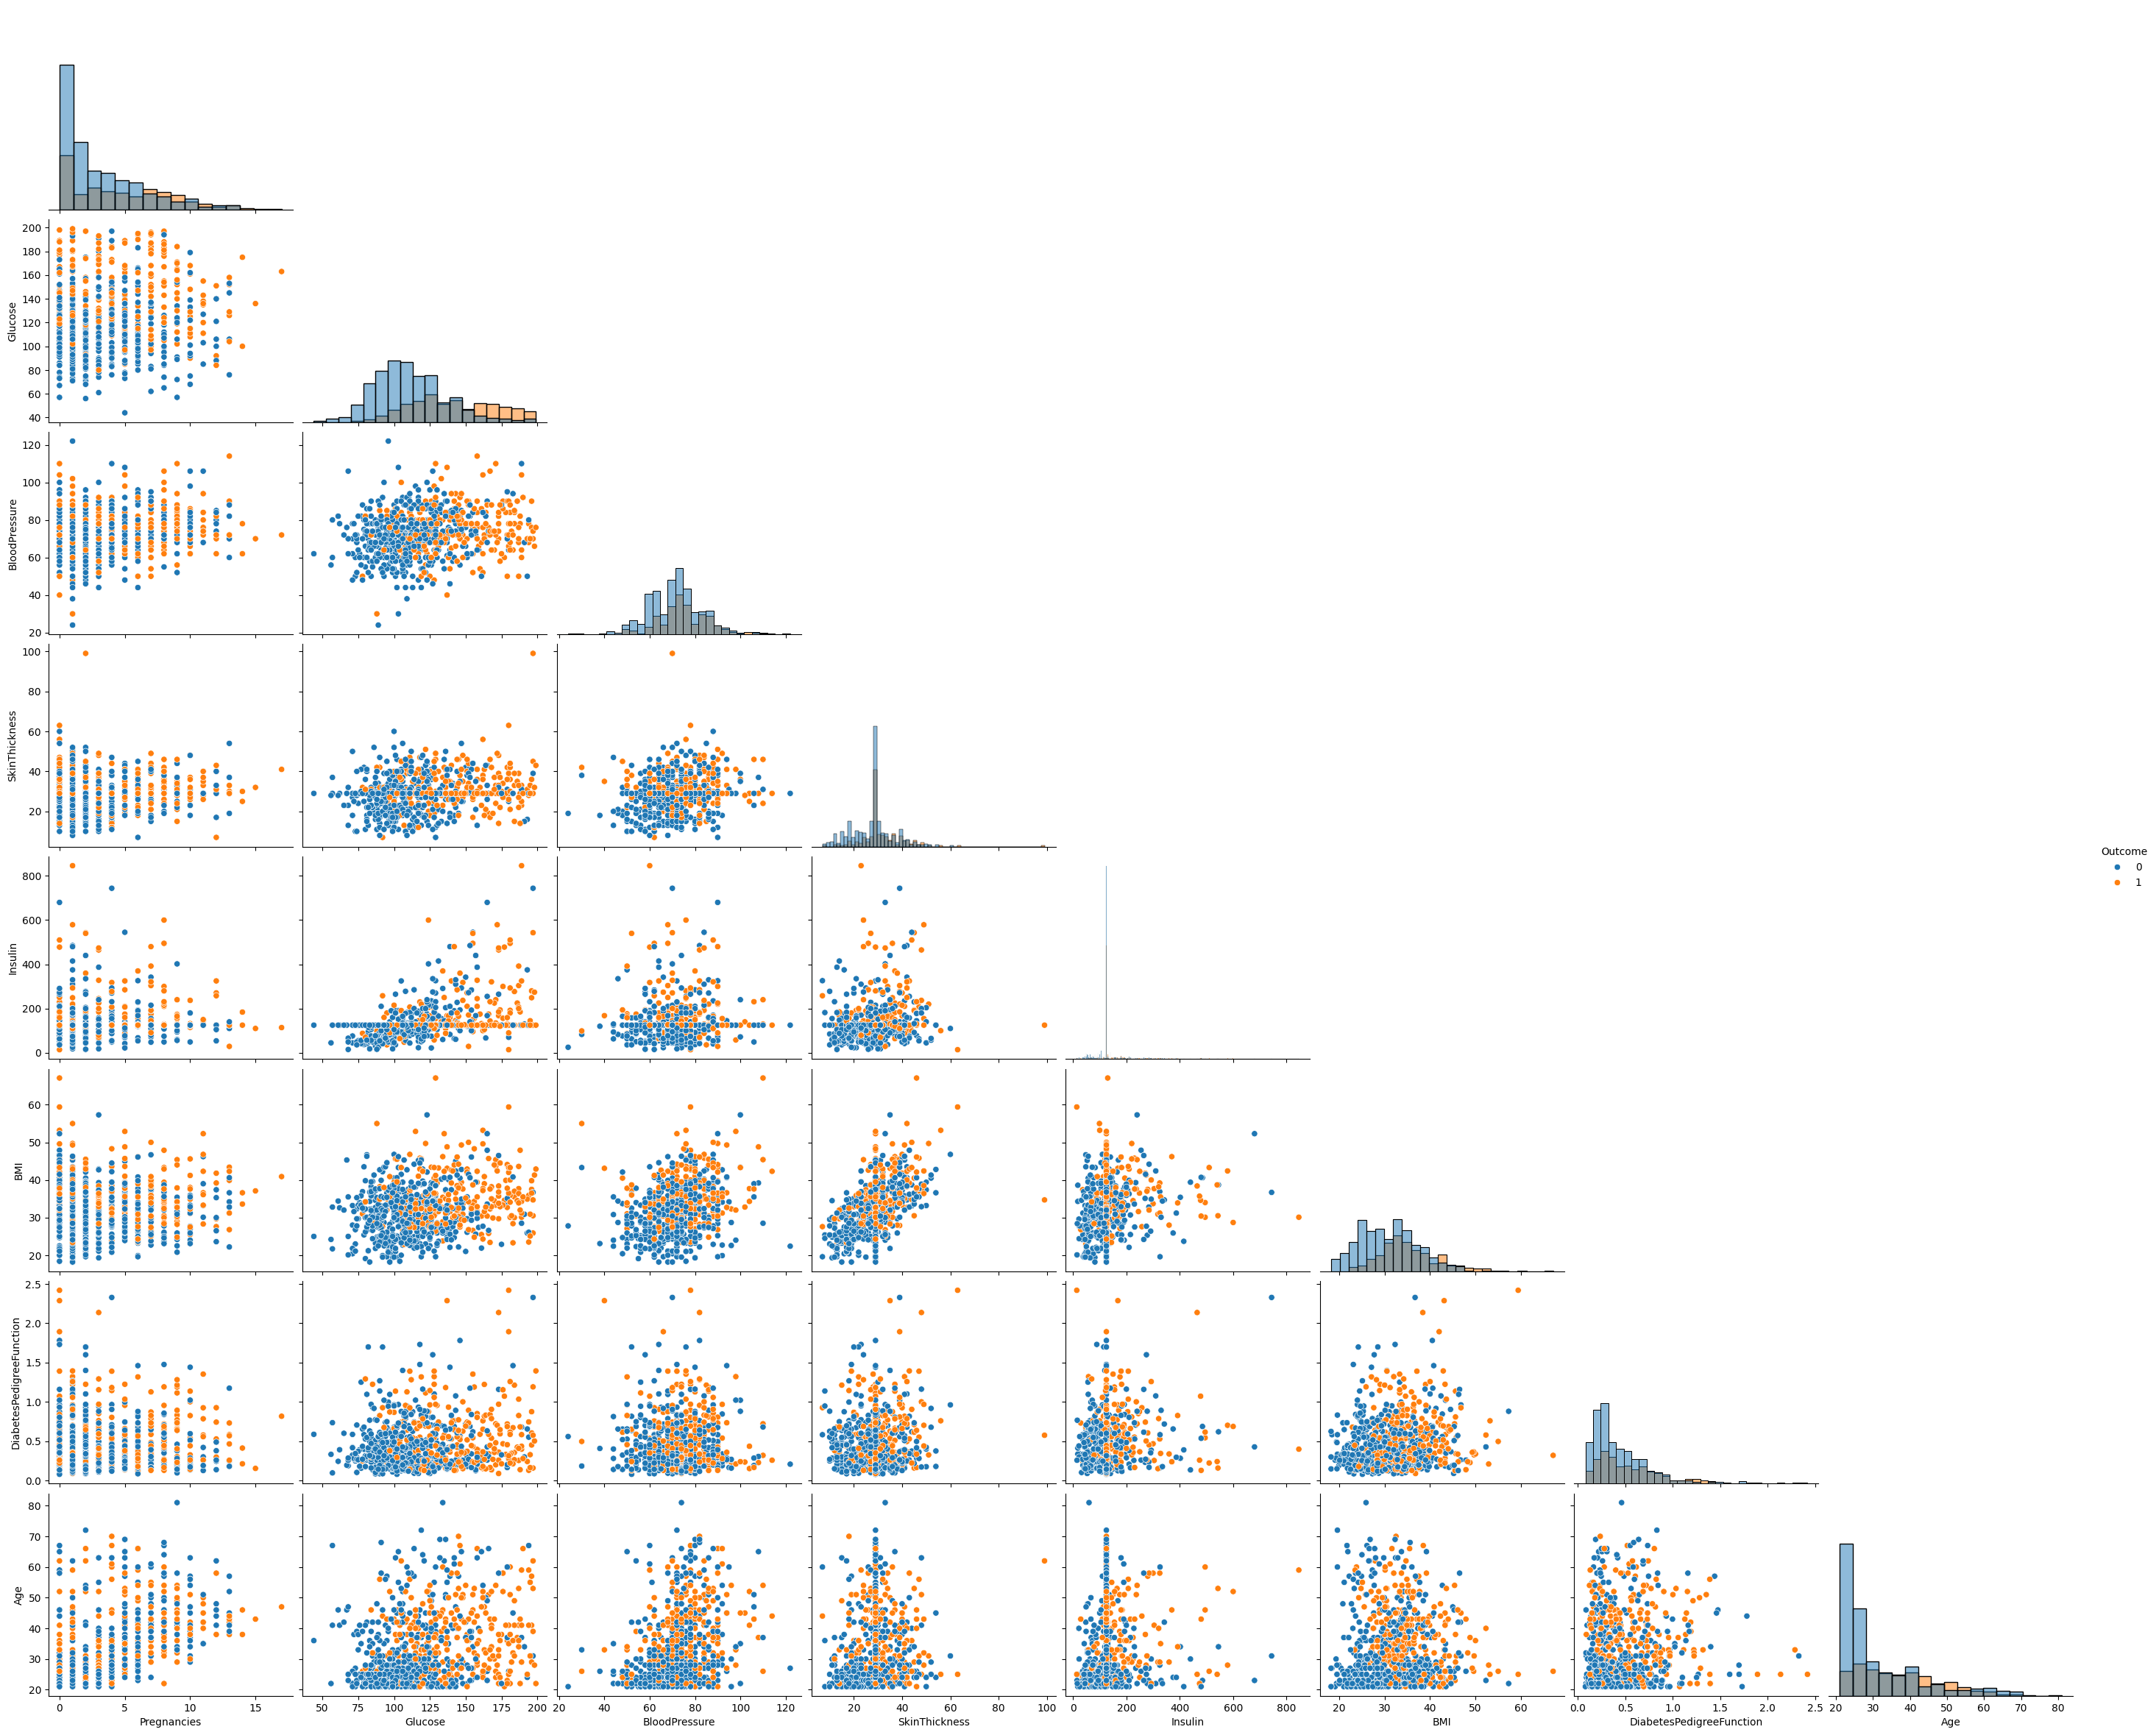

In [62]:
sns.pairplot(df, diag_kind = "hist", hue = "Outcome", height = 3, aspect = 1.2, corner = True);

### Heatmap

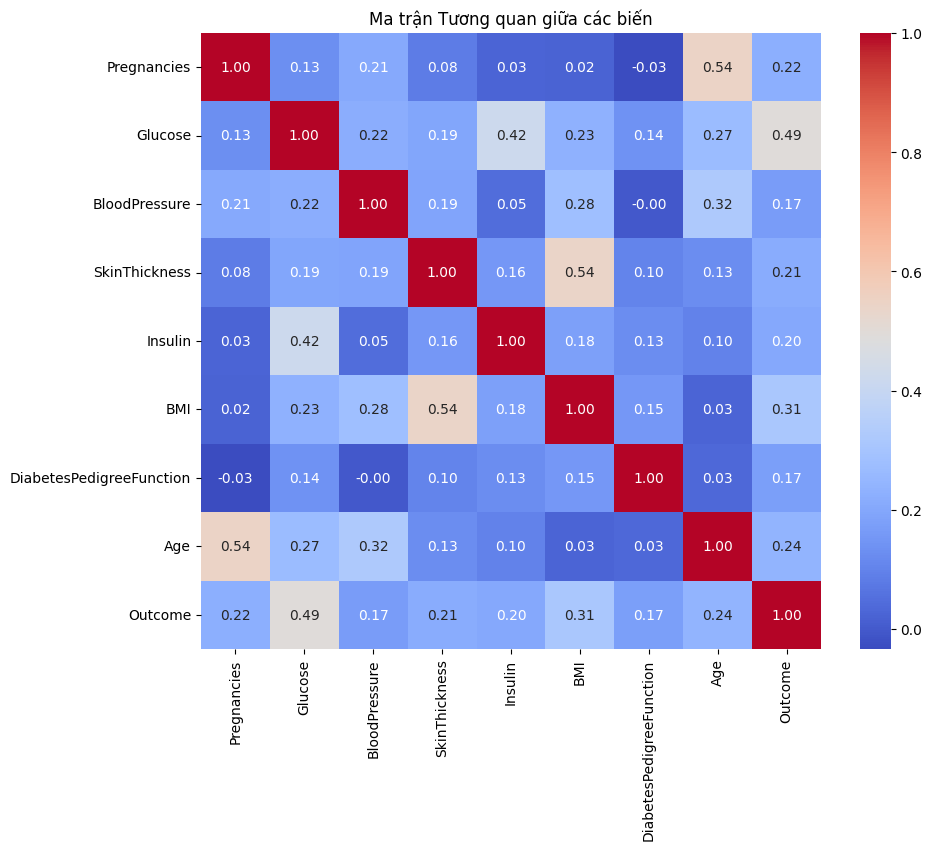

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Ma trận Tương quan giữa các biến')
plt.show()

# Kết thúc